###### Rasheed Alqobbaj - 1202474
# Diabetes classification model
Your task is to create a machine learning model to predict whether or not a patient has diabetes based on certain diagnostic measurements included in the attached dataset.

You should build the best-performing model that you can. Make sure you validate your model using a training and testing set.

1. Clean your data 
- validate data types, 
- duplicates, 
- inconsistency, 
- extreme values
2. Prepare the data appropriately for modeling
- Implement a preprocessing pipeline to avoid data leakage.
- Check for missing values. You should produce an output showing the number of missing values for each feature.
- Handle missing values by using an appropriate imputation strategy (instead of dropping rows).
- Write a justification of your strategy for imputing missing values.
- Make sure you avoid any data leakage when you impute values.
- Scale the data if your model requires it.
- Write a justification for how you encode the variables (ordinal encoding vs one-hot encoding).
3. Training and evaluation
- Create your model.
- Put your preprocessing and models into pipelines.
- Use appropriate metrics to evaluate your model.
- Try to tune your model to find the best results Choose one final model.
- Write a justification for your choice of the final model

4. Clean code
Include clear, commented, and organized code. Please note that points will be deducted for inclusion of:
- inappropriate or redundant code
- inappropriate or unused imports for modeling or evaluation metrics
- errors remaining in code
- Inappropriate or unnecessary files

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data and cleaning

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,WeightGroup,AgeGroup,Gender,Outcome
0,4,189.0,110.0,31.0,NaN,0_68,overweight,18 - 44,F,0
1,2,157.0,74.0,35.0,440.0,0.134,obese_2,18 - 44,F,0
2,6,98.0,58.0,33.0,190.0,0.43,obese_1,18 - 44,F,0
3,6,111.0,64.0,39.0,NaN,0.26,obese_1,18 - 44,F,0
4,3,106.0,72.0,NaN,NaN,0_207,overweight,18 - 44,F,0


we can already see that there are some missing values in the dataset and a variety in the data types. Let's check the data types and missing values.

### Data types and missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               642 non-null    int64  
 1   Glucose                   638 non-null    float64
 2   BloodPressure             616 non-null    float64
 3   SkinThickness             455 non-null    float64
 4   Insulin                   331 non-null    float64
 5   DiabetesPedigreeFunction  642 non-null    object 
 6   WeightGroup               642 non-null    object 
 7   AgeGroup                  642 non-null    object 
 8   Gender                    642 non-null    object 
 9   Outcome                   642 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 50.3+ KB


For the datatypes we can see that the data types are correct except for `DiabetesPedigreeFunction` which should be a float. and for the missing values we can see that there are missing values in the float columns, especially in the `Insulin` feature with almost half the entries missing.

### Fixing the data types

In [4]:
# problem example: "0_68" replace the _ with . to convert the string to float
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].str.replace('_', '.').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               642 non-null    int64  
 1   Glucose                   638 non-null    float64
 2   BloodPressure             616 non-null    float64
 3   SkinThickness             455 non-null    float64
 4   Insulin                   331 non-null    float64
 5   DiabetesPedigreeFunction  642 non-null    float64
 6   WeightGroup               642 non-null    object 
 7   AgeGroup                  642 non-null    object 
 8   Gender                    642 non-null    object 
 9   Outcome                   642 non-null    int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 50.3+ KB


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,WeightGroup,AgeGroup,Gender,Outcome
0,4,189.0,110.0,31.0,NaN,0.680,overweight,18 - 44,F,0
1,2,157.0,74.0,35.0,440.0,0.134,obese_2,18 - 44,F,0
2,6,98.0,58.0,33.0,190.0,0.430,obese_1,18 - 44,F,0
3,6,111.0,64.0,39.0,NaN,0.260,obese_1,18 - 44,F,0
4,3,106.0,72.0,NaN,NaN,0.207,overweight,18 - 44,F,0


As we can see the data types are now fixed, as for the missing values we will handle them later in the data prep section.

### Duplicates

In [6]:
duplicates = df[df.duplicated(keep=False)]

# Print the duplicate rows
print(f'There are {int(len(duplicates)/2)} duplicated rows')
duplicates

There are 3 duplicated rows


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,WeightGroup,AgeGroup,Gender,Outcome
400,1,126.0,60.0,NaN,NaN,0.349,obese_1,45 - 64,F,1
463,1,126.0,60.0,NaN,NaN,0.349,obese_1,45 - 64,F,1
536,0,137.0,40.0,35.0,168.0,2.288,obsese_3,18 - 44,M,1
582,8,183.0,64.0,NaN,NaN,0.672,healthy weight,18 - 44,F,1
601,8,183.0,64.0,NaN,NaN,0.672,healthy weight,18 - 44,F,1
618,0,137.0,40.0,35.0,168.0,2.288,obsese_3,18 - 44,M,1


There are 3 duplicated rows, we will drop them.

### Dropping duplicates

In [7]:
df.drop_duplicates(inplace=True)

Let's check if the duplicates are removed.

In [8]:
duplicates = df[df.duplicated(keep=False)]

# Print the duplicate rows
print(f'There are {int(len(duplicates)/2)} duplicated rows')
duplicates

There are 0 duplicated rows


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,WeightGroup,AgeGroup,Gender,Outcome


As we can see the duplicates are removed.

### Inconsistency

In [9]:
object_features = ['WeightGroup', 'AgeGroup', 'Gender']
for feature in object_features:
    print(f'{feature} unique values: {df[feature].unique()}')

WeightGroup unique values: ['overweight' 'obese_2' 'obese_1' 'obsese_3' 'healthy weight' 'MISSING'
 'underweight']
AgeGroup unique values: ['18 - 44' '45 - 64' '<65' '>65']
Gender unique values: ['F' 'm' 'M']


We can see the `Gender` feature has both 'm' and 'M' so will fix that, also the `AgeGroup` feature has '<65' which doesn't make sense since there are the '18 - 44' and '45 - 64' ranges.

### Fixing inconsistency

In [10]:
# Fixing the Gender feature
df['Gender'] = df['Gender'].map(lambda x: x.upper())
df['Gender'].value_counts()

Gender
F    563
M     76
Name: count, dtype: int64

In [11]:
# Fixing the AgeGroup feature
df['AgeGroup'].value_counts()

AgeGroup
18 - 44    526
45 - 64    102
>65          8
<65          3
Name: count, dtype: int64

In [12]:
df[df['AgeGroup'] == '<65']

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,WeightGroup,AgeGroup,Gender,Outcome
126,5,103.0,108.0,37.0,NaN,0.305,obese_2,<65,F,0
222,6,166.0,74.0,NaN,NaN,0.304,overweight,<65,F,0
345,8,194.0,80.0,NaN,NaN,0.551,overweight,<65,F,0


Since there are no hints to decide which range they should be in, we will drop them. (Knowing that normally in real life we should ask the data provider)

In [13]:
df = df[df['AgeGroup'] != '<65']
df['AgeGroup'].value_counts()

AgeGroup
18 - 44    526
45 - 64    102
>65          8
Name: count, dtype: int64

### Extreme values

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome
count,636.000000,632.000000,610.000000,453.000000,330.000000,636.000000,636.000000
mean,5.460692,123.783228,72.411475,29.454746,158.969697,0.472425,0.421384
std,39.644960,30.625008,12.193414,10.541566,117.432069,0.325973,0.494169
min,0.000000,56.000000,24.000000,7.000000,14.000000,0.085000,0.000000
25%,1.000000,100.000000,64.000000,22.000000,82.250000,0.245750,0.000000
50%,3.000000,120.000000,72.000000,30.000000,130.000000,0.378000,0.000000
75%,6.000000,143.250000,80.000000,36.000000,192.750000,0.629250,1.000000
max,1000.000000,199.000000,114.000000,99.000000,846.000000,2.420000,1.000000


From a simple look we can tell there is an outlier in the `Pregnancies` feature, and possibly in the `Insulin` and `DiabetesPedigreeFunction` features. we will use Z-score to detect the outliers.

In [15]:
# Z-score function 
def z_score(df, column):
    return (df[column] - df[column].mean()) / df[column].std()

# Detecting outliers for all the features
for feature in df.columns:
    if df[feature].dtype != 'object':
        z = z_score(df, feature)
        outliers = df[abs(z) >= 3]
        print(f'{feature} outliers: {len(outliers)}')
        if len(outliers) > 0:
            print(outliers[feature])

Pregnancies outliers: 1
371    1000
Name: Pregnancies, dtype: int64
Glucose outliers: 0
BloodPressure outliers: 7
0      110.0
275     24.0
281     30.0
429    110.0
484    110.0
604    114.0
626     30.0
Name: BloodPressure, dtype: float64
SkinThickness outliers: 2
593    99.0
641    63.0
Name: SkinThickness, dtype: float64
Insulin outliers: 6
332    680.0
461    543.0
462    846.0
509    540.0
541    600.0
574    579.0
Name: Insulin, dtype: float64
DiabetesPedigreeFunction outliers: 9
115    1.600
127    1.476
235    1.699
344    1.781
356    1.731
514    2.137
536    2.288
613    1.893
641    2.420
Name: DiabetesPedigreeFunction, dtype: float64
Outcome outliers: 0


Since we see that there are a lot of outliers in the features, we will sit them to nan and impute them later in the data prep section.

In [16]:
# Setting the outliers to nan
for feature in df.columns:
    if df[feature].dtype != 'object':
        z = z_score(df, feature)
        df[feature] = df[feature].mask(abs(z) >= 3) # Mask is a numpy function that replaces the values with nan

## Data Preparation

### Missing values

In [17]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Pregnancies                   1
Glucose                       4
BloodPressure                33
SkinThickness               185
Insulin                     312
DiabetesPedigreeFunction      9
dtype: int64

In [18]:
df[df['WeightGroup'] == 'MISSING']

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,WeightGroup,AgeGroup,Gender,Outcome
30,0.0,102.0,75.0,23.0,NaN,0.572,MISSING,18 - 44,M,0
260,3.0,80.0,NaN,NaN,NaN,0.174,MISSING,18 - 44,F,0
349,5.0,136.0,82.0,NaN,NaN,0.640,MISSING,>65,F,0
354,2.0,84.0,NaN,NaN,NaN,0.304,MISSING,18 - 44,F,0
356,0.0,118.0,64.0,23.0,89.0,NaN,MISSING,18 - 44,M,0
535,10.0,115.0,NaN,NaN,NaN,0.261,MISSING,18 - 44,F,1
555,1.0,181.0,78.0,42.0,293.0,1.258,MISSING,18 - 44,F,1
571,8.0,125.0,96.0,NaN,NaN,0.232,MISSING,45 - 64,F,1


I decided to replace the MISSING with null so that i can impute them later in the pipeline.

In [19]:
df['WeightGroup'] = df['WeightGroup'].replace('MISSING', np.nan)

In [20]:
print(df['WeightGroup'].value_counts())
print(df['AgeGroup'].value_counts())

WeightGroup
obese_1           195
overweight        144
obese_2           125
obsese_3           86
healthy weight     74
underweight         4
Name: count, dtype: int64
AgeGroup
18 - 44    526
45 - 64    102
>65          8
Name: count, dtype: int64


### Splitting the data

In [21]:
from sklearn.model_selection import train_test_split

# Create feature matrix and target vector
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1202474)

I decided to split the data now to avoid data leakage when building the preprocessing pipeline. I also decided to use an 80-20 split since the dataset is small.

## Preprocessing pipeline

In [22]:
from sklearn import set_config
set_config(transform_output='pandas') #To generate dataframes instead of numpy arrays

In [23]:
numerical_features = X_train.select_dtypes(include=[np.number]).columns
categorical_features = X_train.select_dtypes(include=[object]).columns

print('Numerical Features:', numerical_features)
print('Categorical Features:', categorical_features)

Numerical Features: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction'],
      dtype='object')
Categorical Features: Index(['WeightGroup', 'AgeGroup', 'Gender'], dtype='object')


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Imputers
imputer_mean = SimpleImputer(strategy='mean') # For numerical features
imputer_mode = SimpleImputer(strategy='most_frequent') # For categorical features

# Encoders
weight_order = ['underweight', 'healthy weight', 'overweight', 'obese_1', 'obese_2', 'obsese_3']
age_order = ['18 - 44', '45 - 64', '>65']
ord_encoder = OrdinalEncoder(categories=[weight_order, age_order])
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Scaler
scaler = StandardScaler()
ord_scaler = StandardScaler()

# Preprocessing pipelines
num_pipe = make_pipeline(imputer_mean, scaler)
ord_pipe = make_pipeline(imputer_mode, ord_encoder, ord_scaler)
onehot_pipe = make_pipeline(onehot_encoder)

# Tuples for the column transformer
transformers = [
    ('num', num_pipe, numerical_features),
    ('ord', ord_pipe, ['WeightGroup', 'AgeGroup']),
    ('onehot', onehot_pipe, ['Gender'])
    ]

# Column transformer
preprocessor = ColumnTransformer(transformers, remainder='passthrough')

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction'],
      dtype='object')),
                                ('ord',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['underweight',
                                                                              'healthy '
                                                                              'weight',
                                                                              'overweight',
                                                                              'obese_1',
                                                                              'obese_2',
                                                                              'obsese_3'],
                                                                             ['18 '
                                                                              '- '
                                                                              '44',
                                                                              '45 '
                                                                              '- '
                                                                              '64',
                                                                              '>65']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['WeightGroup', 'AgeGroup']),
                                ('onehot',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['Gender'])])

In [25]:
# Fit the preprocessor
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction'],
      dtype='object')),
                                ('ord',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['underweight',
                                                                              'healthy '
                                                                              'weight',
                                                                              'overweight',
                                                                              'obese_1',
                                                                              'obese_2',
                                                                              'obsese_3'],
                                                                             ['18 '
                                                                              '- '
                                                                              '44',
                                                                              '45 '
                                                                              '- '
                                                                              '64',
                                                                              '>65']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['WeightGroup', 'AgeGroup']),
                                ('onehot',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['Gender'])])

In [26]:
# Transform the data
X_train_prep = preprocessor.transform(X_train)
X_test_prep = preprocessor.transform(X_test)

X_train_prep.head()

,num__Pregnancies,num__Glucose,num__BloodPressure,num__SkinThickness,num__Insulin,num__DiabetesPedigreeFunction,ord__WeightGroup,ord__AgeGroup,onehot__Gender_M
616,-1.156926,1.278410,0.383035,0.844036,8.229131e-16,-0.303248,1.659702,-0.446196,1.0
308,-1.156926,-0.613034,-0.365872,-0.894979,8.229131e-16,-0.762759,-1.643446,-0.446196,1.0
251,2.156710,-1.276698,0.195808,0.000000,8.229131e-16,-0.533004,0.008128,-0.446196,0.0
621,-1.156926,0.747479,-0.178645,0.000000,8.229131e-16,-0.410946,0.833915,-0.446196,1.0
165,1.554231,-1.077599,-0.365872,0.000000,8.229131e-16,-0.891996,-1.643446,1.939780,0.0


I decided to use mode (most_frequent) to replace the MISSING values in the `WeightGroup` feature since it's a categorical feature, and the mean for the numerical features because it's simple and the data is not skewed. I also decided to use one-hot encoding for the `Gender` feature since it's a nominal feature, and ordinal encoding for the `WeightGroup` and `AgeGroup` features since they are ordinal features.

## Training and evaluation

I want to compare between the following models:
- Logistic Regression
- Decision Tree 
- SVM
- Random Forest

I will first start with building naive models and then tune the best performing model. 
I will evaluate the models based on accuracy, precision, recall, and F1 score.
I will also print the results of both the training and testing sets to check for overfitting.

In [27]:
# Function to plot confusion matrix in a pretty way
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

In [28]:
# Lists to store accuracy, precision, recall, and F1 score
accuracy = []
precision = []
recall = []
f1 = []

### Logistic Regression

Logistic Regression
Train Accuracy:0.78
Train Precision:0.76
Train Recall:0.68
Train F1:0.72


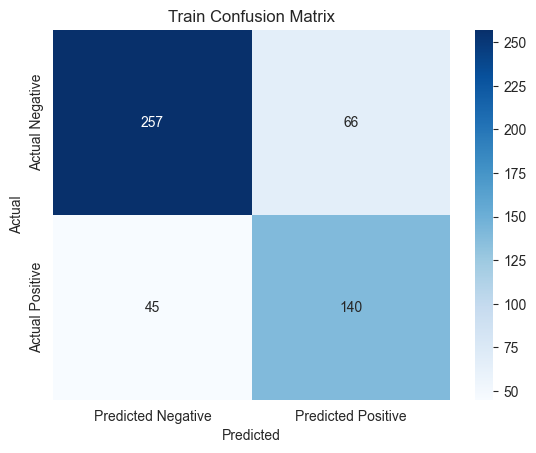

Test Accuracy:0.71
Test Precision:0.75
Test Recall:0.61
Test F1:0.67


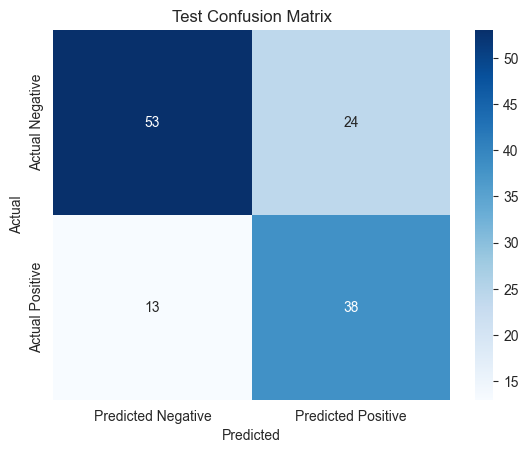

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Logistic Regression model
log_reg = LogisticRegression(random_state=1202474)
log_reg.fit(X_train_prep, y_train)

# Predictions
y_train_pred = log_reg.predict(X_train_prep)
y_test_pred = log_reg.predict(X_test_prep)

# Metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Store the metrics
accuracy.append(test_accuracy)
precision.append(test_precision)
recall.append(test_recall)
f1.append(test_f1)

print('Logistic Regression')
print(f'Train Accuracy:{train_accuracy:.2f}')
print(f'Train Precision:{train_precision:.2f}')
print(f'Train Recall:{train_recall:.2f}')
print(f'Train F1:{train_f1:.2f}')
plot_confusion_matrix(y_train_pred, y_train, title='Train Confusion Matrix')

print(f'Test Accuracy:{test_accuracy:.2f}')
print(f'Test Precision:{test_precision:.2f}')
print(f'Test Recall:{test_recall:.2f}')
print(f'Test F1:{test_f1:.2f}')
plot_confusion_matrix(y_test_pred, y_test, title='Test Confusion Matrix')

### Decision Tree

Decision Tree
Train Accuracy:1.00
Train Precision:1.00
Train Recall:1.00
Train F1:1.00


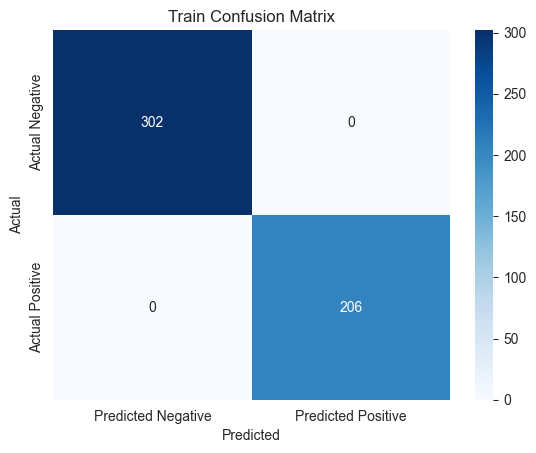

Test Accuracy:0.69
Test Precision:0.68
Test Recall:0.66
Test F1:0.67


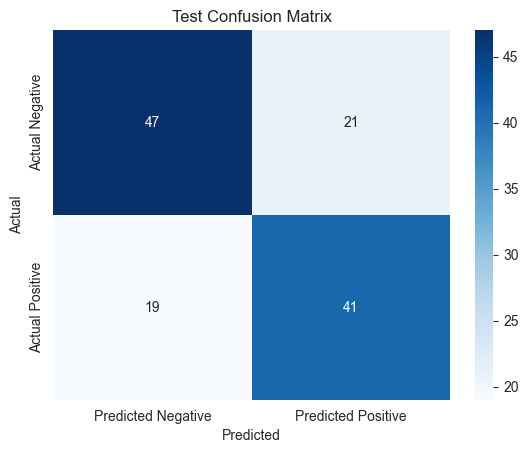

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
dt = DecisionTreeClassifier(random_state=1202474)
dt.fit(X_train_prep, y_train)

# Predictions
y_train_pred = dt.predict(X_train_prep)
y_test_pred = dt.predict(X_test_prep)

# Metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Store the metrics
accuracy.append(test_accuracy)
precision.append(test_precision)
recall.append(test_recall)
f1.append(test_f1)

print('Decision Tree')
print(f'Train Accuracy:{train_accuracy:.2f}')
print(f'Train Precision:{train_precision:.2f}')
print(f'Train Recall:{train_recall:.2f}')
print(f'Train F1:{train_f1:.2f}')
plot_confusion_matrix(y_train_pred, y_train, title='Train Confusion Matrix')

print(f'Test Accuracy:{test_accuracy:.2f}')
print(f'Test Precision:{test_precision:.2f}')
print(f'Test Recall:{test_recall:.2f}')
print(f'Test F1:{test_f1:.2f}')
plot_confusion_matrix(y_test_pred, y_test, title='Test Confusion Matrix')

### SVM

SVM
Train Accuracy:0.81
Train Precision:0.84
Train Recall:0.67
Train F1:0.75


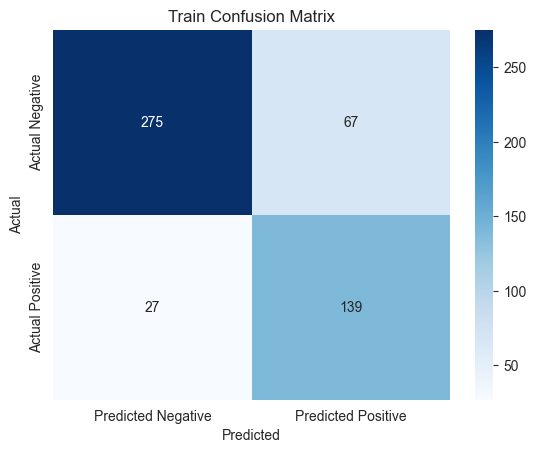

Test Accuracy:0.70
Test Precision:0.73
Test Recall:0.58
Test F1:0.65


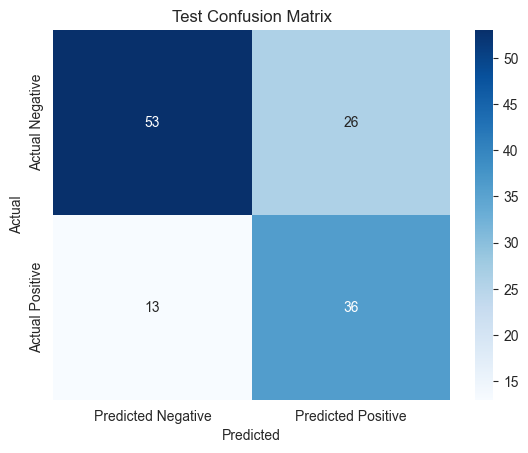

In [31]:
from sklearn.svm import SVC

# SVM model
svm = SVC(random_state=1202474)
svm.fit(X_train_prep, y_train)

# Predictions
y_train_pred = svm.predict(X_train_prep)
y_test_pred = svm.predict(X_test_prep)

# Metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Store the metrics
accuracy.append(test_accuracy)
precision.append(test_precision)
recall.append(test_recall)
f1.append(test_f1)

print('SVM')
print(f'Train Accuracy:{train_accuracy:.2f}')
print(f'Train Precision:{train_precision:.2f}')
print(f'Train Recall:{train_recall:.2f}')
print(f'Train F1:{train_f1:.2f}')
plot_confusion_matrix(y_train_pred, y_train, title='Train Confusion Matrix')

print(f'Test Accuracy:{test_accuracy:.2f}')
print(f'Test Precision:{test_precision:.2f}')
print(f'Test Recall:{test_recall:.2f}')
print(f'Test F1:{test_f1:.2f}')
plot_confusion_matrix(y_test_pred, y_test, title='Test Confusion Matrix')

### Random Forest

Random Forest
Train Accuracy:1.00
Train Precision:1.00
Train Recall:1.00
Train F1:1.00


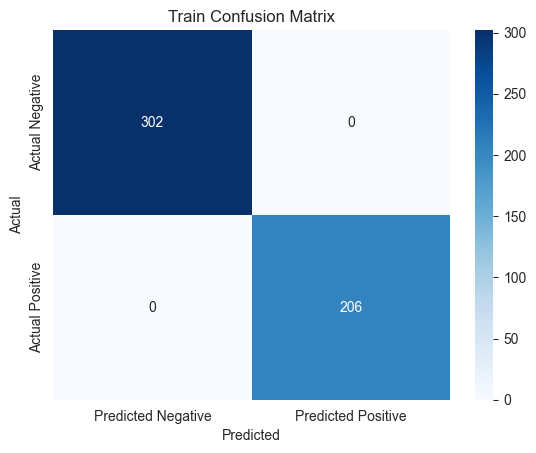

Test Accuracy:0.70
Test Precision:0.74
Test Recall:0.60
Test F1:0.66


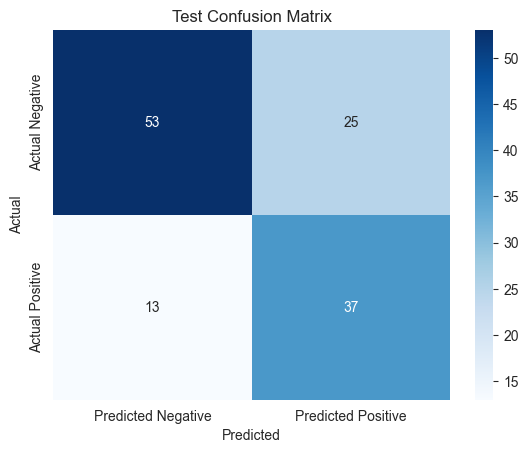

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf = RandomForestClassifier(random_state=1202474)
rf.fit(X_train_prep, y_train)

# Predictions
y_train_pred = rf.predict(X_train_prep)
y_test_pred = rf.predict(X_test_prep)

# Metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Store the metrics
accuracy.append(test_accuracy)
precision.append(test_precision)
recall.append(test_recall)
f1.append(test_f1)

print('Random Forest')
print(f'Train Accuracy:{train_accuracy:.2f}')
print(f'Train Precision:{train_precision:.2f}')
print(f'Train Recall:{train_recall:.2f}')
print(f'Train F1:{train_f1:.2f}')
plot_confusion_matrix(y_train_pred, y_train, title='Train Confusion Matrix')

print(f'Test Accuracy:{test_accuracy:.2f}')
print(f'Test Precision:{test_precision:.2f}')
print(f'Test Recall:{test_recall:.2f}')
print(f'Test F1:{test_f1:.2f}')
plot_confusion_matrix(y_test_pred, y_test, title='Test Confusion Matrix')

### Model comparison

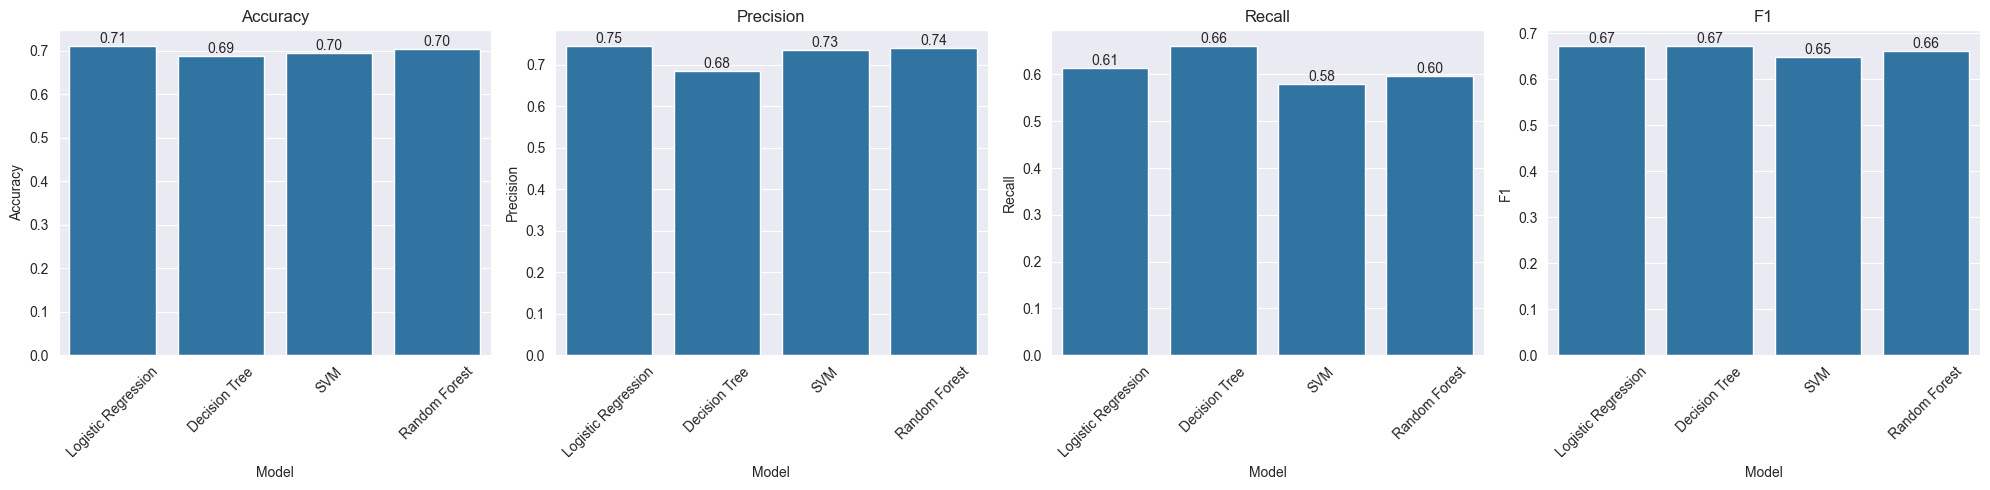

In [33]:
models = ['Logistic Regression', 'Decision Tree', 'SVM', 'Random Forest']
results = pd.DataFrame({'Model': models, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1})

# Plotting the results
plt.figure(figsize=(20, 5))

# Accuracy plot
plt.subplot(1, 4, 1)
ax1 = sns.barplot(x='Model', y='Accuracy', data=results)
plt.title('Accuracy')
ax1.bar_label(ax1.containers[0], fmt='%.2f')
plt.xticks(rotation=45)

# Precision plot
plt.subplot(1, 4, 2)
ax2 = sns.barplot(x='Model', y='Precision', data=results)
plt.title('Precision')
ax2.bar_label(ax2.containers[0], fmt='%.2f')
plt.xticks(rotation=45)

# Recall plot
plt.subplot(1, 4, 3)
ax3 = sns.barplot(x='Model', y='Recall', data=results)
plt.title('Recall')
ax3.bar_label(ax3.containers[0], fmt='%.2f')
plt.xticks(rotation=45)

# F1 plot
plt.subplot(1, 4, 4)
ax4 = sns.barplot(x='Model', y='F1', data=results)
plt.title('F1')
ax4.bar_label(ax4.containers[0], fmt='%.2f')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

I'm surprised by the results, all the models are very close to each other on all metrics (Except the Decision Tree overfitting) which makes it hard to choose the best model. I will choose the SVM because its a strong learner and I like it. I think with some tuning it can perform better.

### Tuning the model

In [34]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5]
}

# Grid search
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train_prep, y_train)

# Best parameters
grid_search.best_params_

{'C': 0.1, 'degree': 2, 'kernel': 'linear'}

### Final model

Final Model
Test Accuracy:0.70
Test Precision:0.73
Test Recall:0.58
Test F1:0.65


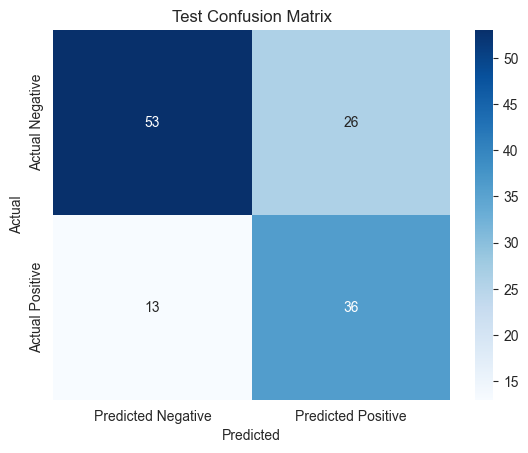

In [35]:
# Final model
final_model = grid_search.best_estimator_
final_model.fit(X_train_prep, y_train)

# Predictions
y_test_pred = final_model.predict(X_test_prep)

# Metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print('Final Model')
print(f'Test Accuracy:{test_accuracy:.2f}')
print(f'Test Precision:{test_precision:.2f}')
print(f'Test Recall:{test_recall:.2f}')
print(f'Test F1:{test_f1:.2f}')
plot_confusion_matrix(y_test_pred, y_test, title='Test Confusion Matrix')

I'm a little disappointed that the tuning didn't improve the model, overall I'm very happy with the assignment it was my first time tinkering with pipelines and taking preprocessing seriously. I learned a lot across this course and I'm very grateful for it.

###### Rasheed Alqobbaj - 1202474